In [1]:
#inroducing the packages we will be using in this analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the data for PAUT
data_paut = {
    'WELDED PLATE ID': ['PLATE 1155', 'PLATE 1155', 'PLATE 14820', 'PLATE 14820'],
    'TYPES OF DISCONTINUITIES': ['Porosity', 'Excessive Penetration', 'Crack', 'Porosity'],
    'LOCATION FROM 0 (mm)': [92.5, 168, 3.5, 136],
    'LENGTH OF DEFECT (mm)': [18.5, 19.0, 28.5, 25.0]
}

In [3]:
df_paut = pd.DataFrame(data_paut)

In [4]:
df_paut

,WELDED PLATE ID,TYPES OF DISCONTINUITIES,LOCATION FROM 0 (mm),LENGTH OF DEFECT (mm)
0,PLATE 1155,Porosity,92.5,18.5
1,PLATE 1155,Excessive Penetration,168.0,19.0
2,PLATE 14820,Crack,3.5,28.5
3,PLATE 14820,Porosity,136.0,25.0


In [5]:
# Define the data for RT
data_rt = {
    'WELDING PLATE': ['PLATE 1155', 'PLATE 1155', 'PLATE 14820', 'PLATE 14820'],
    'TYPES OF DISCONTINUITIES': ['Porosity', 'Excessive Penetration', 'Crack', 'Porosity'],
    'LOCATION FROM 0 (mm)': [95.5, 187, 19.9, 150],
    'LENGTH OF DEFECT (mm)': [3.24, 17.8, 25.7, 21.0]
}

In [20]:
from scipy.stats import ttest_rel

# Merge the data on 'WELDED PLATE ID' and 'TYPES OF DISCONTINUITIES' to align the defects for paired comparison
merged_data = pd.merge(
    df_paut,
    df_rt,
    on=['WELDED PLATE ID', 'TYPES OF DISCONTINUITIES'],
    suffixes=('_PAUT', '_RT')
)

# Perform paired t-test
stat, p_value = ttest_rel(merged_data['LENGTH OF DEFECT (mm)_PAUT'], merged_data['LENGTH OF DEFECT (mm)_RT'])

print('Paired t-test statistic:', stat)
print('P-value:', p_value)

Paired t-test statistic: 1.8171083877095258
P-value: 0.16680151712224353


In [6]:
# Create DataFrame for DIR
df_rt = pd.DataFrame(data_rt)

In [7]:
df_rt

,WELDING PLATE,TYPES OF DISCONTINUITIES,LOCATION FROM 0 (mm),LENGTH OF DEFECT (mm)
0,PLATE 1155,Porosity,95.5,3.24
1,PLATE 1155,Excessive Penetration,187.0,17.80
2,PLATE 14820,Crack,19.9,25.70
3,PLATE 14820,Porosity,150.0,21.00


In [9]:
# Rename columns in DIR DataFrame to match PAUT DataFrame
df_rt.rename(columns={'WELDING PLATE': 'WELDED PLATE ID'}, inplace=True)

In [10]:
# Add a source column to differentiate between PAUT and DIR data
df_paut['SOURCE'] = 'PAUT'
df_rt['SOURCE'] = 'RT'


In [11]:
# Combine both DataFrames
df_combined = pd.concat([df_paut, df_rt], ignore_index=True)

In [12]:
df_combined

,WELDED PLATE ID,TYPES OF DISCONTINUITIES,LOCATION FROM 0 (mm),LENGTH OF DEFECT (mm),SOURCE
0,PLATE 1155,Porosity,92.5,18.50,PAUT
1,PLATE 1155,Excessive Penetration,168.0,19.00,PAUT
2,PLATE 14820,Crack,3.5,28.50,PAUT
3,PLATE 14820,Porosity,136.0,25.00,PAUT
4,PLATE 1155,Porosity,95.5,3.24,RT
5,PLATE 1155,Excessive Penetration,187.0,17.80,RT
6,PLATE 14820,Crack,19.9,25.70,RT
7,PLATE 14820,Porosity,150.0,21.00,RT


In [13]:
# Group by WELDED PLATE ID and TYPES OF DISCONTINUITIES
comparison = df_combined.groupby(['WELDED PLATE ID', 'TYPES OF DISCONTINUITIES', 'SOURCE'])['LENGTH OF DEFECT (mm)'].mean().unstack()
print(comparison)


SOURCE                                    PAUT     RT
WELDED PLATE ID TYPES OF DISCONTINUITIES             
PLATE 1155      Excessive Penetration     19.0  17.80
                Porosity                  18.5   3.24
PLATE 14820     Crack                     28.5  25.70
                Porosity                  25.0  21.00


In [14]:
# Compare total lengths of defects per plate
total_length_comparison = df_combined.groupby(['WELDED PLATE ID', 'SOURCE'])['LENGTH OF DEFECT (mm)'].sum().unstack()
print(total_length_comparison)

SOURCE           PAUT     RT
WELDED PLATE ID             
PLATE 1155       37.5  21.04
PLATE 14820      53.5  46.70


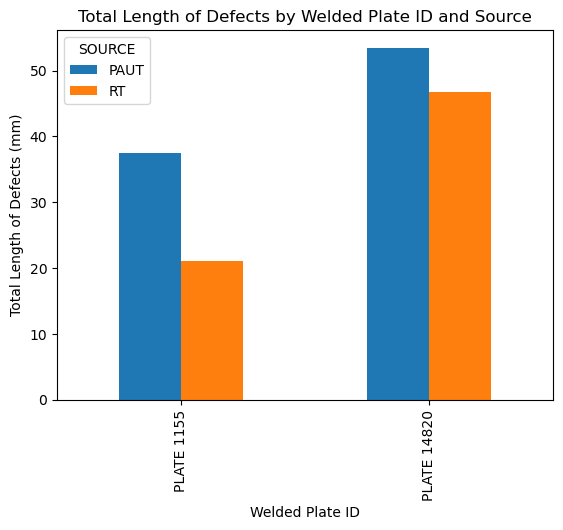

In [15]:
# Bar plot for total length of defects by plate and source
total_length_comparison.plot(kind='bar')
plt.title('Total Length of Defects by Welded Plate ID and Source')
plt.xlabel('Welded Plate ID')
plt.ylabel('Total Length of Defects (mm)')
plt.show()

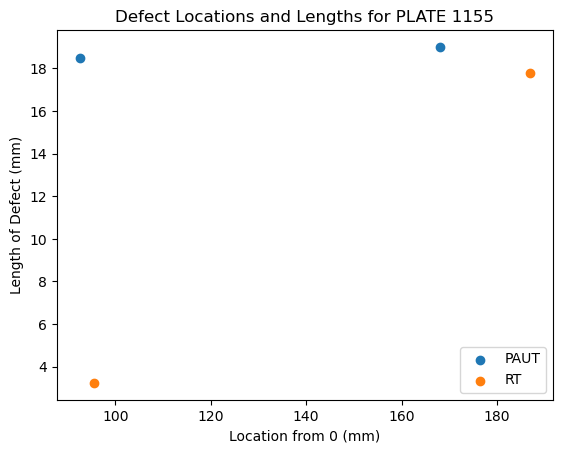

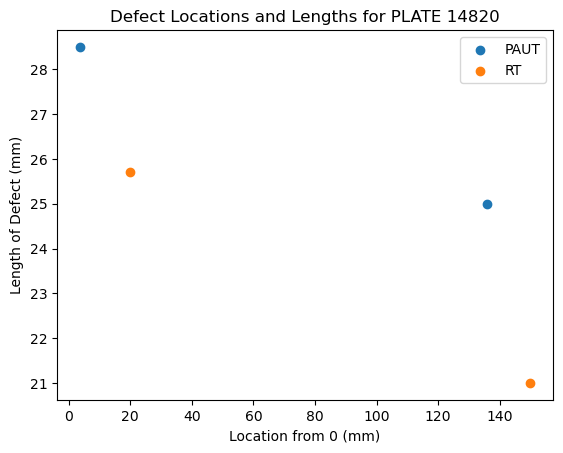

In [16]:
# Scatter plot for defect locations by source
for plate_id in df_combined['WELDED PLATE ID'].unique():
    df_plate = df_combined[df_combined['WELDED PLATE ID'] == plate_id]
    plt.figure()
    for source in df_plate['SOURCE'].unique():
        df_source = df_plate[df_plate['SOURCE'] == source]
        plt.scatter(df_source['LOCATION FROM 0 (mm)'], df_source['LENGTH OF DEFECT (mm)'], label=source)
    plt.title(f'Defect Locations and Lengths for {plate_id}')
    plt.xlabel('Location from 0 (mm)')
    plt.ylabel('Length of Defect (mm)')
    plt.legend()
    plt.show()

In [19]:
from scipy.stats import ttest_rel

# Assuming you have matching samples for paired t-test
lengths_paut = df_paut['LENGTH OF DEFECT (mm)']
lengths_rt = df_rt['LENGTH OF DEFECT (mm)']

# Perform paired t-test
stat, p_value = ttest_rel(lengths_paut, lengths_rt)

print('Paired t-test statistic:', stat)
print('P-value:', p_value)

Paired t-test statistic: 1.8171083877095258
P-value: 0.16680151712224353


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
# Define features and target
X = df_combined.drop(columns=['WELDED PLATE ID'])
y = df_combined['SOURCE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# Define the data for PAUT
data_paut = {
    'WELDED PLATE ID': ['PLATE 1155', 'PLATE 1155', 'PLATE 14820', 'PLATE 14820'],
    'TYPES OF DISCONTINUITIES': ['Porosity', 'Excessive Penetration', 'Crack', 'Porosity'],
    'LOCATION FROM 0 (mm)': [92.5, 168, 3.5, 136],
    'LENGTH OF DEFECT (mm)': [18.5, 19.0, 28.5, 25.0]
}

# Define the data for RT
data_rt = {
    'WELDING PLATE': ['PLATE 1155', 'PLATE 1155', 'PLATE 14820', 'PLATE 14820'],
    'TYPES OF DISCONTINUITIES': ['Porosity', 'Excessive Penetration', 'Crack', 'Porosity'],
    'LOCATION FROM 0 (mm)': [95.5, 187, 19.9, 150],
    'LENGTH OF DEFECT (mm)': [3.24, 17.8, 25.7, 21.0]
}

# Create DataFrames
df_paut = pd.DataFrame(data_paut)
df_rt = pd.DataFrame(data_rt)
df_rt.rename(columns={'WELDING PLATE': 'WELDED PLATE ID'}, inplace=True)

# Add a source column
df_paut['SOURCE'] = 'PAUT'
df_rt['SOURCE'] = 'RT'

# Combine DataFrames
df_combined = pd.concat([df_paut, df_rt], ignore_index=True)

In [48]:
df_combined

,WELDED PLATE ID,TYPES OF DISCONTINUITIES,LOCATION FROM 0 (mm),LENGTH OF DEFECT (mm),SOURCE
0,PLATE 1155,Porosity,92.5,18.50,PAUT
1,PLATE 1155,Excessive Penetration,168.0,19.00,PAUT
2,PLATE 14820,Crack,3.5,28.50,PAUT
3,PLATE 14820,Porosity,136.0,25.00,PAUT
4,PLATE 1155,Porosity,95.5,3.24,RT
5,PLATE 1155,Excessive Penetration,187.0,17.80,RT
6,PLATE 14820,Crack,19.9,25.70,RT
7,PLATE 14820,Porosity,150.0,21.00,RT


In [49]:
# One-hot encode the 'TYPES OF DISCONTINUITIES' column
df_combined = pd.get_dummies(df_combined, columns=['TYPES OF DISCONTINUITIES'])

# Label encode the 'SOURCE' column
df_combined['SOURCE'] = df_combined['SOURCE'].map({'PAUT': 0, 'RT': 1})

print(df_combined.head())

  WELDED PLATE ID  LOCATION FROM 0 (mm)  LENGTH OF DEFECT (mm)  SOURCE  \
0      PLATE 1155                  92.5                  18.50       0   
1      PLATE 1155                 168.0                  19.00       0   
2     PLATE 14820                   3.5                  28.50       0   
3     PLATE 14820                 136.0                  25.00       0   
4      PLATE 1155                  95.5                   3.24       1   

   TYPES OF DISCONTINUITIES_Crack  \
0                           False   
1                           False   
2                            True   
3                           False   
4                           False   

   TYPES OF DISCONTINUITIES_Excessive Penetration  \
0                                           False   
1                                            True   
2                                           False   
3                                           False   
4                                           False   

   TYPES OF D

In [50]:
# Define features and target
X = df_combined.drop(columns=['WELDED PLATE ID'])
y = df_combined['SOURCE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 1.00
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



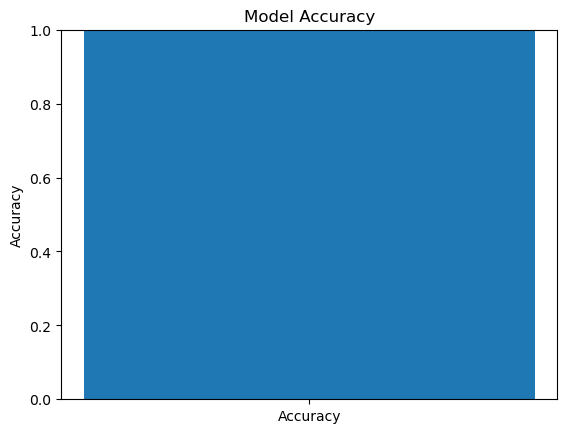

In [53]:
# Bar plot for accuracy
plt.bar(['Accuracy'], [accuracy])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

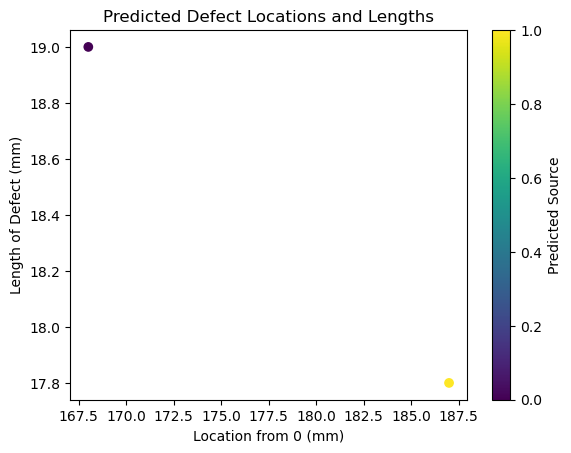

In [54]:
# Scatter plot for predictions
plt.scatter(X_test['LOCATION FROM 0 (mm)'], X_test['LENGTH OF DEFECT (mm)'], c=y_pred, cmap='viridis')
plt.title('Predicted Defect Locations and Lengths')
plt.xlabel('Location from 0 (mm)')
plt.ylabel('Length of Defect (mm)')
plt.colorbar(label='Predicted Source')
plt.show()


In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
